In [1]:
using Megafauna
using CairoMakie
using DelimitedFiles
using StatsBase

X = readdlm("../data/prinz/prinz-potential.txt")

[ Info: Precompiling Megafauna [acce3a02-0e32-41b8-bb90-7402d3d41f55] (cache misses: wrong dep version loaded (2), incompatible header (12))
[ Info: Precompiling DistributedExt [075b2bf6-2807-5c02-93c4-9c66b4782582] (cache misses: wrong dep version loaded (2), incompatible header (2))


100000×1 Matrix{Float64}:
  0.0
  0.051143667354386524
  0.08600807236266525
  0.007153524256075693
  0.14186588177505005
  0.14685408069336753
  0.2535870479970487
  0.18941749180005957
  0.3047502923621745
  0.18713377631989392
  0.21610093725491342
  0.2072503732460562
  0.34310215731208693
  ⋮
 -0.7744094981718489
 -0.7757513160218188
 -0.8781407678458266
 -0.9277912881824416
 -0.8307554860495173
 -0.6648800452189343
 -0.6931762294352226
 -0.6701892664526988
 -0.5470280921110552
 -0.8015793197195583
 -0.8804054232794996
 -0.9271776014688877

enumerating change points
number of dimensions: 1


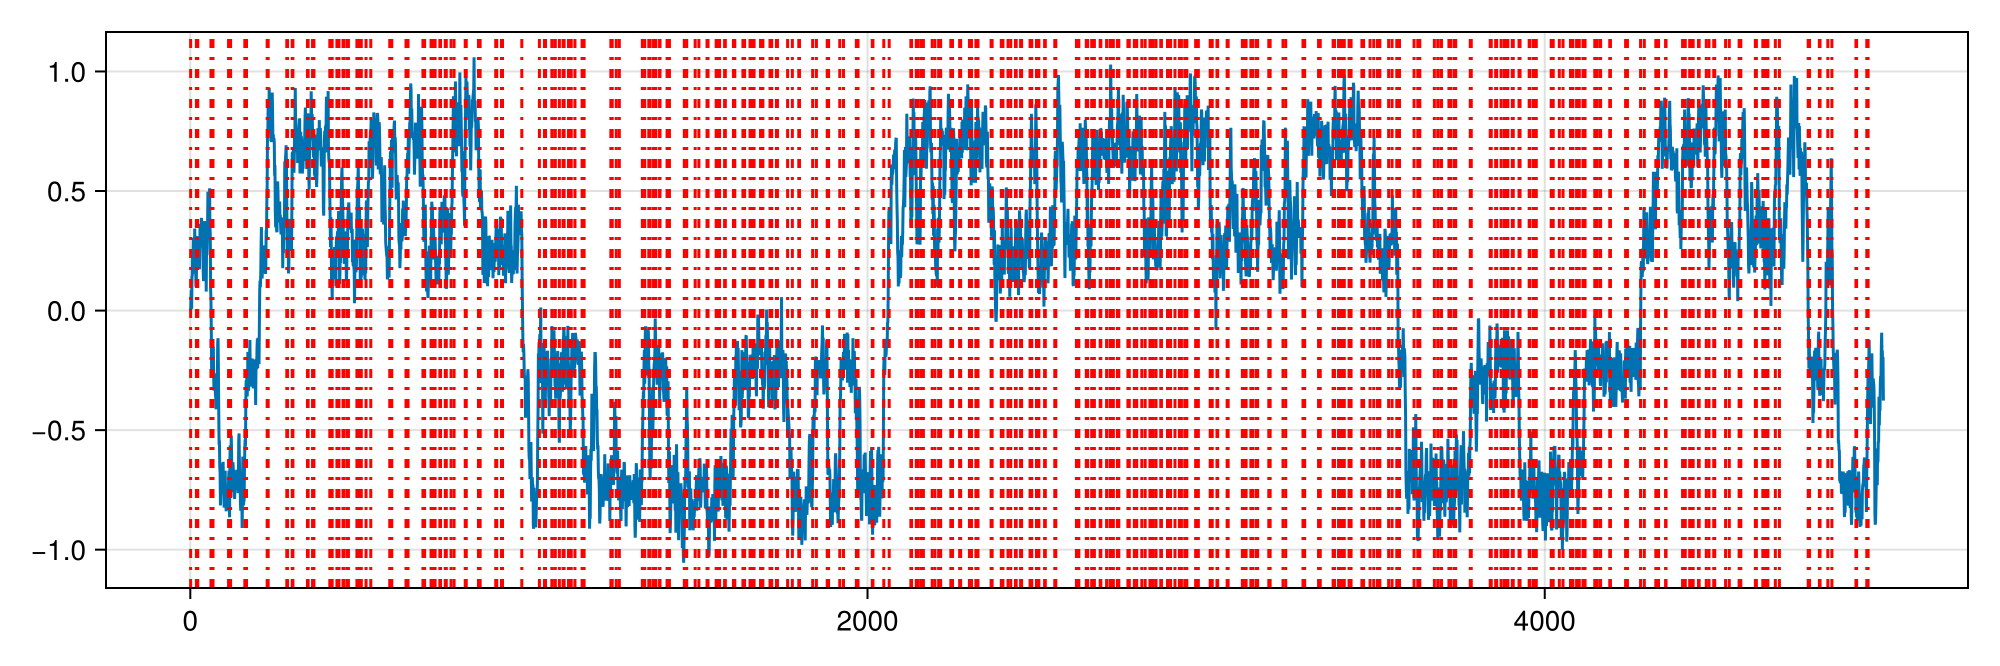

In [15]:
changes = compute_change_points(X, 0.25, 16)
T = 5000
Tc = findfirst(x -> x > T, changes) - 1
f = Figure(size=(1000,333))
ax = Axis(f[1,1])
lines!(ax, 1:T, X[1:T,1])
vlines!(ax, changes[1:Tc], color=:red, linestyle=:dashdot)
f

In [16]:
includet("../src/SegmentDistances.jl")
D = pairwise_segment_distances_1d(X, changes)
open("/home/dcg/projects/DPA/prinz_dists.txt", "w") do io
        writedlm(io, D)
end

Number of segments = 6093
Computing 18559278 segment distances


Progress: 100%|█████████████████████████████████████████| Time: 0:02:06


finished computing distances


In [101]:
function assign_colors(labels, colors)
    counts = countmap(labels)
    sorted = sort(collect(keys(counts)), by=x->counts[x], rev=true)
    c = []
    L = length(colors)
    for l in labels
        if l == -1
            push!(c, :grey)
        else
            k = findfirst(==(l), sorted)
            k < L - 1 ? push!(c, colors[k]) : push!(c, :grey)
        end
    end
    return c
end


assign_colors (generic function with 1 method)

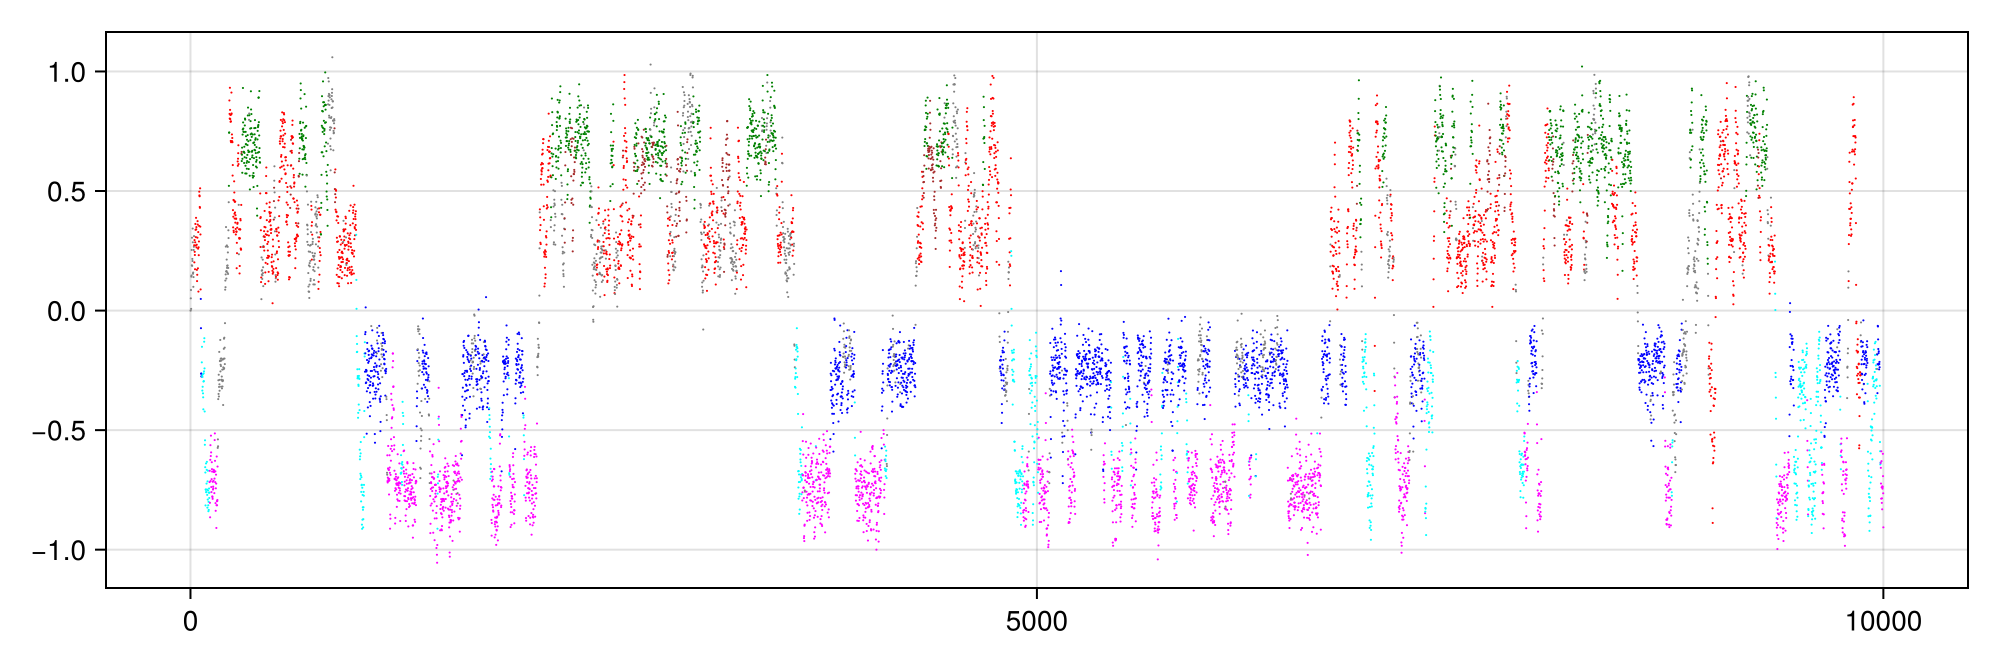

In [102]:
labels = convert(Vector{Int32}, readdlm("/home/dcg/projects/DPA/prinz_dists_dpa_labels.txt")[:,1])
pl = convert(Vector{Int32}, label_series(X, changes, labels))
colors = [:red, :blue, :green, :magenta, :cyan, :brown, :black, :grey]
pc = assign_colors(pl, colors)
T = 10000
f = Figure(size=(1000,333))
ax = Axis(f[1,1])
scatter!(ax, 1:T, X[1:T,1], color=pc, markersize=1.5)
#vlines!(ax, changes[1:Tc], color=:red, linestyle=:dashdot)
f

In [112]:
counts = countmap(pl)
sort(collect(values(counts)), rev=true)

26-element Vector{Int64}:
 30689
 17481
 15428
 11942
  6220
  4707
  3989
  3130
  2432
  1799
   806
   740
   147
   111
    91
    84
    55
    55
    26
    18
    15
    12
     9
     6
     4
     4